<br>
# **머신러닝을 활용한 텍스트 분석 및 챗봇**


[word2vec 블로그](https://shuuki4.wordpress.com/2016/01/27/word2vec-%EA%B4%80%EB%A0%A8-%EC%9D%B4%EB%A1%A0-%EC%A0%95%EB%A6%AC/)<br>
[word2vec 파이쿵](http://pythonkim.tistory.com/92)<br>
[골빈 Tensorflow](https://github.com/golbin/TensorFlow-Tutorials)<br>
[자연어 기초정리](http://hero4earth.com/blog/learning/2018/01/17/NLP_Basics_01/)<br>

<br>
## **1 Tag Counting**

In [6]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter

# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (※1)
fp   = codecs.open("./data/BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text")
text = body.getText()
text[:400]

'\n제1편 어둠의 발소리\n서(序)\n1897년의 한가위.\n까치들이 울타리 안 감나무에 와서 아침 인사를 하기도 전에, 무색 옷에 댕기꼬리를 늘인 아이들은 송편을 입에 물고 마을길을 쏘다니며 기뻐서 날뛴다. 어른들은 해가 중천에서 좀 기울어질 무렵이래야, 차례를 치러야 했고 성묘를 해야 했고 이웃끼리 음식을 나누다 보면 한나절은 넘는다. 이때부터 타작마당에 사람들이 모이기 시작하고 들뜨기 시작하고 -- 남정네 노인들보다 아낙들의 채비는 아무래도 더디어지는데 그럴 수밖에 없는 것이 식구들 시중에 음식 간수를 끝내어도 제 자신의 치장이 남아 있었으니까. 이 바람에 고개가 무거운 벼이삭이 황금빛 물결을 이루는 들판에서는, 마음놓은 새떼들이 모여들어 풍성한 향연을 벌인다.\n"후우이이 -- 요놈의 새떼들아!"  극성스럽게'

In [2]:
# 텍스트를 한 줄씩 처리하기 --- (※2)
twitter = Twitter()
word_dic = {}
lines = text.split("\n")
for line in lines:
    # Token 별 Tag 값을 부여한다
    malist = twitter.pos(line)
    for word in malist:
        # Tag 값이 "Noun" 일 때
        if word[1] == "Noun": 
            # dict 에 Token 값이 없으면 추가생성
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            # dict 에 Token 값이 있으면 +1
            word_dic[word[0]] += 1

# 출변 빈도를 기준으로 정렬하기
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[:50]:
    print("{0}({1}) ".format(word, count), end="")
print()

것(628) 그(519) 말(377) 안(304) 소리(198) 길(194) 용이(193) 눈(187) 내(178) 놈(176) 사람(167) 치수(160) 평산(160) 얼굴(156) 와(150) 못(149) 일(145) 거(145) 댁(141) 때(139) 수(138) 이(138) 강청댁(137) 서방(125) 나(124) 서희(119) 일이(117) 더(116) 어디(112) 봉순(112) 마을(111) 최(110) 머(110) 년(107) 만(107) 집(105) 제(104) 김(99) 칠성(97) 니(97) 구천이(96) 날(94) 생각(93) 뒤(91) 두(90) 아이(88) 믄(88) 하나(84) 월(83) 참판(82) 


<br>
## **2 Word2vec**
문장을 벡터로 변환

In [10]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (※1)
fp = codecs.open("./data/BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text")
text = body.getText()
text[:200]

'\n제1편 어둠의 발소리\n서(序)\n1897년의 한가위.\n까치들이 울타리 안 감나무에 와서 아침 인사를 하기도 전에, 무색 옷에 댕기꼬리를 늘인 아이들은 송편을 입에 물고 마을길을 쏘다니며 기뻐서 날뛴다. 어른들은 해가 중천에서 좀 기울어질 무렵이래야, 차례를 치러야 했고 성묘를 해야 했고 이웃끼리 음식을 나누다 보면 한나절은 넘는다. 이때부터 타작마당에 사람'

In [13]:
# 텍스트를 한 줄씩 처리하기 --- (※2)
twitter = Twitter()
results = []
lines = text.split("\r\n")
for line in lines:
    # 형태소 분석하기 : 단어의 기본형 사용
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외 
        if not word[1] in ["Eomi", "Josa", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
#     print(rl)

In [14]:
# Word2Vec 모델을 파일로 저장
wakati_file = 'toji.wakati'
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

data  = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, 
    size = 200, window=10, hs=1, min_count=2, sg=1)
model.save("toji.model")
print("ok")

ok


<br>
## **3 Word2vec Ploting**
저장된 객체를 시각화 해보기

In [2]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('./toji.model')

In [11]:
model.wv.most_similar(positive=['진지'])

/home/markbaum/Python/python/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('낭', 0.9725409746170044),
 ('두꺼비', 0.9710109233856201),
 ('버들', 0.9706915616989136),
 ('오싰소', 0.9672563076019287),
 ('숨기', 0.9654555320739746),
 ('아래쪽', 0.9642593264579773),
 ('백일홍나무', 0.9622131586074829),
 ('쇠붙이', 0.9618426561355591),
 ('초', 0.9614419341087341),
 ('꽉', 0.961366593837738)]

In [6]:
model.wv.most_similar(positive=['밥'])

/home/markbaum/Python/python/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('담그다', 0.8558757305145264),
 ('묵고', 0.845052182674408),
 ('바리때', 0.8271012902259827),
 ('먹다', 0.8226621150970459),
 ('처', 0.8198369145393372),
 ('쑬', 0.8192482590675354),
 ('덕', 0.8188669681549072),
 ('카더', 0.8142681121826172),
 ('주무시다', 0.8073223829269409),
 ('도둑질', 0.805798351764679)]

## **나이브 베이즈**
1. 각 단어별 차이없이 노출빈도를 통해서 문서의 특징을 구별한다
1. 크기가 작고, 성능이 높아서 자주 사용한다
1. 개별 단어의 특징을 찾고, 유사한 그룹을 묶기 위해서는 다른 기법이 필요하다
1. 다차원 벡터공간에 어휘들을 배치하여 단어간의 유사도를 비교할 수 있다 --> Word2Vec

## Word2Vec의 학습

P(o|c)=exp(uTovc)∑Ww=1exp(uTwvc) cf) exp는 자연상수로 Log 값을 실수로 변환시 사용[블로그](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/03/30/word2vec/)

1. Word2Vec의 Skip-gram은 아래 식을 최대화하는 방향으로 학습을 진행합니다. 
1. 아래 식 좌변은 중심단어(c)가 주어졌을 때 주변단어(o)가 나타날 확률이라는 뜻입니다. 
1. 식을 최대화하려면 우변의 분자는 키우고 분모는 줄여야 합니다.
    1. 우선 우변의 v는 입력층-은닉층을 잇는 가중치 행렬 W의 행벡터
    1. u 는 은닉층-출력층을 잇는 가중치 행렬 W′의 열벡터입니다.

1. 우변 분자의 지수를 키우는 건 중심단어(c)에 해당하는 벡터와 주변단어(o)에 해당하는 벡터의 내적값을 높인다
1. 벡터 내적은 코사인(각도가 좁을수록 크다) 이므로 내적값 상향은 단어벡터 간 유사도를 높인다
1. 분모는 줄일 수록 좋은데요, 그 의미는 윈도우 크기 내에 등장하지 않는 단어들은 중심단어와의 유사도를 감소시킨다는 정도로 이해하면 될 것 같습니다.

### word2Vec 시각화 사이트
### https://ronxin.github.io/wevi/

http://euriion.com/?p=411929
1. 텍스트의 Token 간의 유사도 특정을 Cos 을 사용한 벡터의 내적을 활용
1. 유사도 측정값 : tf-idf 를 통해서 token 갯수를  줄이고

어휘간 빈도의 분포를 **지수 스케일 값**으로 정의를 한 뒤, 이들 벡터간의 Cosin 각도값을 활용하여 단어간의 유사도를 계산한다

In [18]:
%matplotlib inline

In [19]:
land = model.wv.most_similar(positive=['땅'])

/home/markbaum/Python/python/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [22]:
land

[('농사', 0.8372488021850586),
 ('사시', 0.8323265910148621),
 ('전폐', 0.8240393400192261),
 ('손주', 0.8229700326919556),
 ('꾼', 0.8219377398490906),
 ('동하', 0.821672797203064),
 ('된장', 0.8185518980026245),
 ('올', 0.8183315396308899),
 ('열세', 0.817737877368927),
 ('지극', 0.8159492015838623)]

In [ ]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

readFp      = codecs.open("./data/wiki.txt", "r", encoding="utf-8")
wakati_file = "wiki.wakati"
writeFp     = open(wakati_file, "w", encoding="utf-8")
twitter     = Twitter()
i           = 0

In [ ]:
while True:
    line = readFp.readline()
    if not line:       break
    if i % 20000 == 0: print("current - " + str(i))
    i += 1  # 형태소 분석
    malist = twitter.pos(line, norm=True, stem=True)    
    r = []  # 필요한 어구만 대상으로 추출하기
    # 어미/조사/구두점 등은 대상에서 제외 
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            writeFp.write(word[0] + " ")
writeFp.close()

current - 0
current - 20000
current - 40000
current - 60000
current - 80000
current - 100000
current - 120000
current - 140000
current - 160000
current - 180000
current - 200000
current - 220000
current - 240000
current - 260000
current - 280000
current - 300000
current - 320000
current - 340000
current - 360000
current - 380000
current - 400000
current - 420000
current - 440000
current - 460000
current - 480000
current - 500000
current - 520000
current - 540000
current - 560000
current - 580000
current - 600000
current - 620000
current - 640000
current - 660000
current - 680000
current - 700000
current - 720000
current - 740000
current - 760000
current - 780000
current - 800000
current - 820000
current - 840000
current - 860000
current - 880000
current - 900000
current - 920000
current - 940000
current - 960000
current - 980000
current - 1000000
current - 1020000
current - 1040000
current - 1060000
current - 1080000
current - 1100000
current - 1120000
current - 1140000
current - 11600

current - 9180000
current - 9200000
current - 9220000
current - 9240000
current - 9260000
current - 9280000
current - 9300000
current - 9320000
current - 9340000
current - 9360000
current - 9380000
current - 9400000
current - 9420000
current - 9440000
current - 9460000
current - 9480000
current - 9500000
current - 9520000
current - 9540000
current - 9560000
current - 9580000
current - 9600000
current - 9620000
current - 9640000
current - 9660000
current - 9680000
current - 9700000
current - 9720000
current - 9740000
current - 9760000
current - 9780000
current - 9800000
current - 9820000
current - 9840000
current - 9860000
current - 9880000
current - 9900000
current - 9920000
current - 9940000
current - 9960000
current - 9980000
current - 10000000
current - 10020000
current - 10040000
current - 10060000
current - 10080000
current - 10100000
current - 10120000
current - 10140000
current - 10160000
current - 10180000
current - 10200000
current - 10220000
current - 10240000
current - 10260

<br>
## **학습 네트워크**

### CBOW (Continuous Bag-of-Words 모델)
1. 원하는 대상 주변의 token을 대상으로 모델을 생성
1. 문장 가운데 비어있는 단어를 채우는 방법
1. 주어진 단어 앞뒤로 여유분의 token을 선택하고
1. 이들을 활용하여 적합한 내용을 유추하는 Network를 생성한다

### skip-gram (Continuous Bag-of-Words 모델)
1. 주어진 token을 갖고서 주위에 등장할 단어들을 유추한다
1. 가까운 단어일수록 가깝고, 먼 단어일수록 빈도가 낮음을 활용한다
1. 위의 CBOW와 같은 모델연산을 요하지만
1. 샘플링 기준이 되는 단어를 몇개로 정하는지에 따라 연산시간이 많이 차이난다
1. 실무에서는 CBOW 보단 skip-gram이 더 좋은 결과를 보여준다

### V to ln(V) : Complexity Reduction
1. 단어의 갯수에 따라 늘어나느 계산량을 줄이기 위해, 

<br>
## word2vec   by TensorFlow
텐서플로로 Word2Vec 구현하기

In [38]:
# Word2Vec 모델을 간단하게 구현해봅니다.
import tensorflow as tf
import numpy as np

In [39]:
# 단어 벡터를 분석해볼 임의의 문장들
sentences = ["나 고양이 좋다",
             "나 강아지 좋다",
             "나 동물 좋다",
             "강아지 고양이 동물",
             "여자친구 고양이 강아지 좋다",
             "고양이 생선 우유 좋다",
             "강아지 생선 싫다 우유 좋다",
             "강아지 고양이 눈 좋다",
             "나 여자친구 좋다",
             "여자친구 나 싫다",
             "여자친구 나 영화 책 음악 좋다",
             "나 게임 만화 애니 좋다",
             "고양이 강아지 싫다",
             "강아지 고양이 좋다"]

word_sequence = " ".join(sentences).split()
word_list     = " ".join(sentences).split()
word_list     = list(set(word_list))
word_dict     = {w: i for i, w in enumerate(word_list)}
# word_sequence : 단어 배열 원본 
# word_list     : 단어 배열 중복제거
# word_dict     : word_list의 인덱스 배열을 생성 

In [52]:
# 윈도우 사이즈를 1 로 하는 skip-gram 모델
skip_grams = []

# 스킵그램을 만든 후, 고유 번호(index)를 저장
for i in range(1, len(word_sequence) - 1):
    target  = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
    for w in context:
        skip_grams.append([target, w])

In [53]:
# skip-gram 데이터에서 무작위로 데이터를 뽑아 입력값과 출력값의 배치 데이터를 생성하는 함수
def random_batch(data, size):
    random_inputs, random_labels = [], []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    for i in random_index:
        random_inputs.append(data[i][0])    # target
        random_labels.append([data[i][1]])  # context word
    return random_inputs, random_labels

In [54]:
training_epoch = 300
learning_rate  = 0.1
batch_size     = 20
embedding_size = 2   # 단어벡터 임베딩 차원 (x, y 2개만 출력)
num_sampled    = 15  # 모델의 nce_loss 샘플크기 (batch_size 보다 작아야 한다)
voc_size       = len(word_list) # 총 단어 갯수

In [55]:
inputs = tf.placeholder(tf.int32, shape=[batch_size])
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

# word2vec 모델의 결과를 저장할 임베딩 벡터를 정의
# (총 단어 X 임베딩) 두 차원을 갖는다.
embeddings     = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)
# 임베딩 벡터의 차원에서 학습할 입력값에 대한 행들을 뽑아옵니다.
# 예) embeddings     inputs    selected
#    [[1, 2, 3]  -> [2, 3] -> [[2, 3, 4]
#     [2, 3, 4]                [3, 4, 5]]
#     [3, 4, 5]
#     [4, 5, 6]]

# nce_loss 함수에서 사용할 변수들을 정의합니다.
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases  = tf.Variable(tf.zeros([voc_size]))

# nce_loss 함수는 tf.nn.nce_loss 함수를 사용
loss = tf.reduce_mean(
            tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size))
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [56]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for step in range(1, training_epoch + 1):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss_val = sess.run([train_op, loss],
                               feed_dict={inputs: batch_inputs,
                                          labels: batch_labels})
        if step % 30 == 0:
            print("loss at step ", step, ": ", loss_val)
    # with 구문 안에서는 sess.run 대신 간단히 eval() 함수를 사용할 수 있습니다.
    trained_embeddings = embeddings.eval()

loss at step  30 :  33.08245
loss at step  60 :  19.765347
loss at step  90 :  6.1211386
loss at step  120 :  21.913052
loss at step  150 :  11.996554
loss at step  180 :  9.107428
loss at step  210 :  14.655977
loss at step  240 :  5.3145204
loss at step  270 :  12.398636
loss at step  300 :  17.214039


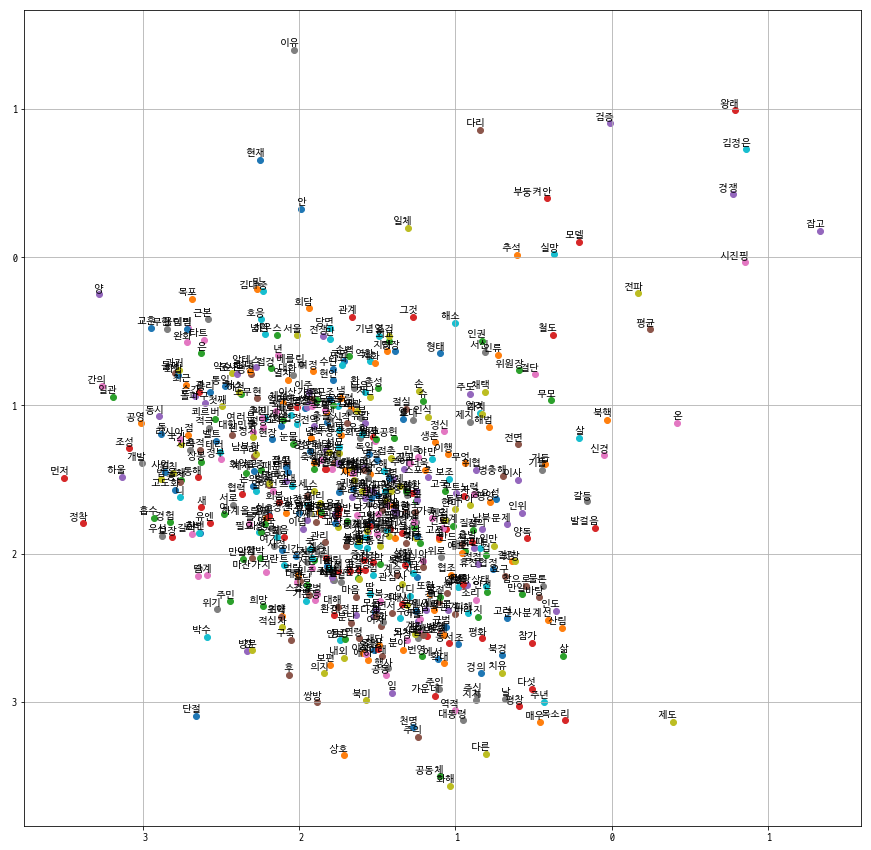

In [58]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
font_name = matplotlib.font_manager.FontProperties(
                fname="./data/D2Coding.ttf").get_name()
matplotlib.rc('font', family=font_name)

plt.figure(figsize=(15,15))
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.grid(True)
plt.show()

<br>
## **베를린 선언문을 활용**

In [48]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
# f     = open('./data/대한민국헌법.txt', 'r')
f     = open('./data/베를린선언.txt', 'r')
texts_org = f.read();  f.close()
texts = texts_org.split('\n')
for dump in ['\n', ',', '.']:
    texts = [txt.replace(dump, '')    for txt in texts]
texts     = [txt    for txt in texts  if len(txt) > 2]
print(len(texts))
texts[:5]

309


['존경하는 독일 국민 여러분',
 '고국에 계신 국민 여러분',
 '하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분',
 '먼저 냉전과 분단을 넘어 통일을 이루고',
 '그 힘으로 유럽통합과 국제평화를 선도하고 있는']

In [50]:
# 선언문 내용중 명사만 추출
from konlpy.tag import Twitter
twitter = Twitter()
texts_nouns = twitter.nouns(texts_org)
texts_nouns[:10]

['독일', '국민', '여러분', '고국', '국민', '여러분', '하울', '젠', '쾨르버', '재단']

In [51]:
word_sequence = texts_nouns
word_list     = texts_nouns
word_list     = list(set(word_list))
word_dict     = {w: i for i, w in enumerate(word_list)}

<br>
<br>
## **3 베이즈 정리로 텍스트 분류하기**
베이지안필터로 학습을 많이 시킬수록 분류능력이 향상된다
1. 지도학습 : 베이즈 정리가 이에 해당
1. 비지도학습
1. 강화학습

In [59]:
import math, sys
from konlpy.tag import Twitter
class BayesianFilter:
    """ 베이지안 필터 """
    def __init__(self):
        self.words = set() # 출현한 단어 기록
        self.word_dict = {} # 카테고리마다의 출현 횟수 기록
        self.category_dict = {} # 카테고리 출현 횟수 기록
    # 형태소 분석하기 --- (※1)
    def split(self, text):
        results = []
        twitter = Twitter()
        # 단어의 기본형 사용
        malist = twitter.pos(text, norm=True, stem=True)
        for word in malist:
            # 어미/조사/구두점 등은 대상에서 제외 
            if not word[1] in ["Josa", "Eomi", "Punctuation"]:
                results.append(word[0])
        return results
    # 단어와 카테고리의 출현 횟수 세기 --- (※2)
    def inc_word(self, word, category):
        # 단어를 카테고리에 추가하기
        if not category in self.word_dict:
            self.word_dict[category] = {}
        if not word in self.word_dict[category]:
            self.word_dict[category][word] = 0
        self.word_dict[category][word] += 1
        self.words.add(word)
    def inc_category(self, category):
        # 카테고리 계산하기
        if not category in self.category_dict:
            self.category_dict[category] = 0
        self.category_dict[category] += 1
    
    # 텍스트 학습하기 --- (※3)
    def fit(self, text, category):
        """ 텍스트 학습 """
        word_list = self.split(text)
        for word in word_list:
            self.inc_word(word, category)
        self.inc_category(category)
    
    # 단어 리스트에 점수 매기기--- (※4)
    def score(self, words, category):
        score = math.log(self.category_prob(category))
        for word in words:
            score += math.log(self.word_prob(word, category))
        return score
    
    # 예측하기 --- (※5)
    def predict(self, text):
        best_category = None
        max_score = -sys.maxsize 
        words = self.split(text)
        score_list = []
        for category in self.category_dict.keys():
            score = self.score(words, category)
            score_list.append((category, score))
            if score > max_score:
                max_score = score
                best_category = category
        return best_category, score_list
    # 카테고리 내부의 단어 출현 횟수 구하기
    def get_word_count(self, word, category):
        if word in self.word_dict[category]:
            return self.word_dict[category][word]
        else:
            return 0
    # 카테고리 계산
    def category_prob(self, category):
        sum_categories = sum(self.category_dict.values())
        category_v = self.category_dict[category]
        return category_v / sum_categories
        
    # 카테고리 내부의 단어 출현 비율 계산 --- (※6)
    def word_prob(self, word, category):
        n = self.get_word_count(word, category) + 1 # ---(※6a)
        d = sum(self.word_dict[category].values()) + len(self.words)
        return n / d

In [61]:
from bayes import BayesianFilter
bf = BayesianFilter()
# 텍스트 학습
bf.fit("파격 세일 - 오늘까지만 30% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")
# 예측
pre, scorelist = bf.predict("재고 정리 할인, 무료 배송")
print("결과 =", pre)
print(scorelist)

ImportError: cannot import name 'BayesianFilter'

<br>
<br>
## **4 MLP로 텍스트 분류하기**
Multi Layer Perceptron (다층 퍼셉트론) : 베이지안필터로 학습을 많이 시킬수록 분류능력이 향상된다
1. 지도학습 : 베이즈 정리가 이에 해당
1. 비지도학습
1. 강화학습

진행할 내용 :
    신문기사와 카테고리를 학습시켜, 내용에 대항하는 카테고리를 예측하는 모델을 생성한다

### 6-4 의 MLP 학습내용은 뒤의 Test 결과 오류를 출력한다
우선은 Skip 하고 넘어가자

<br>
<br>
# **TensorFlow  seq2seq**

In [62]:
# 챗봇, 번역, 이미지 캡셔닝등에 사용되는 시퀀스 학습/생성 모델인 Seq2Seq 을 구현해봅니다.
# 영어 단어를 한국어 단어로 번역하는 프로그램을 만들어봅니다.
import tensorflow as tf
import numpy as np

# S: 디코딩 입력의 시작을 나타내는 심볼
# E: 디코딩 출력을 끝을 나타내는 심볼
# P: 현재 배치 데이터의 time step 크기보다 작은 경우 빈 시퀀스를 채우는 심볼
#    예) 현재 배치 데이터의 최대 크기가 4 인 경우
#       word -> ['w', 'o', 'r', 'd']
#       to   -> ['t', 'o', 'P', 'P']
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀키스사랑']
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)

# 영어를 한글로 번역하기 위한 학습 데이터
seq_data = [['word', '단어'], ['wood', '나무'],
            ['game', '놀이'], ['girl', '소녀'],
            ['kiss', '키스'], ['love', '사랑']]


def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []

    for seq in seq_data:
        # 인코더 셀의 입력값. 입력단어의 글자들을 한글자씩 떼어 배열로 만든다.
        input = [num_dic[n] for n in seq[0]]
        # 디코더 셀의 입력값. 시작을 나타내는 S 심볼을 맨 앞에 붙여준다.
        output = [num_dic[n] for n in ('S' + seq[1])]
        # 학습을 위해 비교할 디코더 셀의 출력값. 끝나는 것을 알려주기 위해 마지막에 E 를 붙인다.
        target = [num_dic[n] for n in (seq[1] + 'E')]

        input_batch.append(np.eye(dic_len)[input])
        output_batch.append(np.eye(dic_len)[output])
        # 출력값만 one-hot 인코딩이 아님 (sparse_softmax_cross_entropy_with_logits 사용)
        target_batch.append(target)

    return input_batch, output_batch, target_batch


#########
# 옵션 설정
######
learning_rate = 0.01
n_hidden = 128
total_epoch = 100
# 입력과 출력의 형태가 one-hot 인코딩으로 같으므로 크기도 같다.
n_class = n_input = dic_len


#########
# 신경망 모델 구성
######
# Seq2Seq 모델은 인코더의 입력과 디코더의 입력의 형식이 같다.
# [batch size, time steps, input size]
enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
# [batch size, time steps]
targets = tf.placeholder(tf.int64, [None, None])


# 인코더 셀을 구성한다.
with tf.variable_scope('encode'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)

    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input,
                                            dtype=tf.float32)

# 디코더 셀을 구성한다.
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)

    # Seq2Seq 모델은 인코더 셀의 최종 상태값을
    # 디코더 셀의 초기 상태값으로 넣어주는 것이 핵심.
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
                                            initial_state=enc_states,
                                            dtype=tf.float32)


model = tf.layers.dense(outputs, n_class, activation=None)


cost = tf.reduce_mean(
            tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=model, labels=targets))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

input_batch, output_batch, target_batch = make_batch(seq_data)

for epoch in range(total_epoch):
    _, loss = sess.run([optimizer, cost],
                       feed_dict={enc_input: input_batch,
                                  dec_input: output_batch,
                                  targets: target_batch})

    print('Epoch:', '%04d' % (epoch + 1),
          'cost =', '{:.6f}'.format(loss))

print('최적화 완료!')


#########
# 번역 테스트
######
# 단어를 입력받아 번역 단어를 예측하고 디코딩하는 함수
def translate(word):
    # 이 모델은 입력값과 출력값 데이터로 [영어단어, 한글단어] 사용하지만,
    # 예측시에는 한글단어를 알지 못하므로, 디코더의 입출력값을 의미 없는 값인 P 값으로 채운다.
    # ['word', 'PPPP']
    seq_data = [word, 'P' * len(word)]

    input_batch, output_batch, target_batch = make_batch([seq_data])

    # 결과가 [batch size, time step, input] 으로 나오기 때문에,
    # 2번째 차원인 input 차원을 argmax 로 취해 가장 확률이 높은 글자를 예측 값으로 만든다.
    prediction = tf.argmax(model, 2)

    result = sess.run(prediction,
                      feed_dict={enc_input: input_batch,
                                 dec_input: output_batch,
                                 targets: target_batch})

    # 결과 값인 숫자의 인덱스에 해당하는 글자를 가져와 글자 배열을 만든다.
    decoded = [char_arr[i] for i in result[0]]

    # 출력의 끝을 의미하는 'E' 이후의 글자들을 제거하고 문자열로 만든다.
    end = decoded.index('E')
    translated = ''.join(decoded[:end])

    return translated


print('\n=== 번역 테스트 ===')
print('word ->', translate('word'))
print('wodr ->', translate('wodr'))
print('love ->', translate('love'))
print('loev ->', translate('loev'))
print('abcd ->', translate('abcd'))

Epoch: 0001 cost = 3.819505
Epoch: 0002 cost = 2.783444
Epoch: 0003 cost = 1.580668
Epoch: 0004 cost = 1.065603
Epoch: 0005 cost = 0.857846
Epoch: 0006 cost = 0.350501
Epoch: 0007 cost = 0.291552
Epoch: 0008 cost = 0.351723
Epoch: 0009 cost = 0.196697
Epoch: 0010 cost = 0.103445
Epoch: 0011 cost = 0.074315
Epoch: 0012 cost = 0.177502
Epoch: 0013 cost = 0.036092
Epoch: 0014 cost = 0.072676
Epoch: 0015 cost = 0.103298
Epoch: 0016 cost = 0.019220
Epoch: 0017 cost = 0.050179
Epoch: 0018 cost = 0.008229
Epoch: 0019 cost = 0.007600
Epoch: 0020 cost = 0.022835
Epoch: 0021 cost = 0.009675
Epoch: 0022 cost = 0.020827
Epoch: 0023 cost = 0.010057
Epoch: 0024 cost = 0.002391
Epoch: 0025 cost = 0.007076
Epoch: 0026 cost = 0.004649
Epoch: 0027 cost = 0.011145
Epoch: 0028 cost = 0.001082
Epoch: 0029 cost = 0.003340
Epoch: 0030 cost = 0.002850
Epoch: 0031 cost = 0.012082
Epoch: 0032 cost = 0.004624
Epoch: 0033 cost = 0.000613
Epoch: 0034 cost = 0.003028
Epoch: 0035 cost = 0.001500
Epoch: 0036 cost = 0

<br>
<br>
## **5 N-gram 으로 문장의 유사도 측정**
"레벤슈타인 편집거리" 또는 "N-gram"을 사용하여 텍스트 유사도를 분석한다

### **레벤슈타인 편집거리 는**  [참고슬라이드](https://www.slideshare.net/eungihong16/ss-56515076)
1. 철자의 오류수정, 비슷한 어구 검색 등으로 활용되고
1. 의학분야에서는 DNA 배열의 유사성을 판단하는 기준으로 사용한다
1. 1번 작업하는 위치는 중요하지 않지만 작업 순번에 따라 최소한의 작업내용을 요약 가능해야 한다

In [22]:
# 레벤슈타인 거리 구하기
def calc_distance(a, b):
    if a == b: return 0 # 단어가 같으면 작업을 종료한다

    # 최대 작업거리를 계산한다
    # 둘 중 내용이 없다면, 다른 내용을 모두 삽입하는 편집거리를 출력한다
    a_len, b_len = len(a), len(b)
    if a == "": return b_len
    if b == "": return a_len

    # 1 최소 작업거리 연산을 진행할 0으로 채워진 2차원 (a_len+1, b_len+1) 준비
    # 축1은 a의 문자열 길이, 축2는 b의 문자열 길이
    matrix = [[]    for i in range(a_len+1)]
    for i in range(a_len+1): # 0으로 초기화
        matrix[i] = [0 for j in range(b_len+1)]
    
    # 개별 축의 기본 거리값을 입력한다
    for i in range(a_len+1):
        matrix[i][0] = i
    
    for j in range(b_len+1):
        matrix[0][j] = j
    
    # 2. 편집작업을 진행하면서 거리를 계산하며 채우기
    # 개별 알파벳 별로 Create/ Delete/ Update 작업을 진행한 뒤
    # 개별 작업 진행별 결과를 출력하여 원하는 결과가 출력될때 까지 진행한다 
    for i in range(1, a_len+1):
        ac = a[i-1]
        for j in range(1, b_len+1):
            bc   = b[j-1]

            # 해당 인덱스 문자열이 같으면 편집거리에 0을 추가한다
            cost = 0  if (ac == bc) else 1
            
            # 해당 인덱스 문자열이 다르면 Create/ Delete/ Update 작업을 진행하고
            # 최소의 값을 추출하여 Matrix에 입력한다
            matrix[i][j] = min([
                matrix[i-1][j] + 1,     # 문자 삽입
                matrix[i][j-1] + 1,     # 문자 제거
                matrix[i-1][j-1] + cost # 문자 변경
            ])
    return matrix[a_len][b_len]

In [23]:
# 두 단어간의 편집거리 계산

# "가나다라"와 "가마바라"의 거리 --- (※3)
print(calc_distance("알고리즘연산방법","머신러닝연산"))

6


In [24]:
# 실행 예
# 맨 앞의 글자와, 나머지 인덱스 글자들과의 편집거리를 계산한다
samples = ["신구역","신천군","신천역","신발","마곡역"]
base    = samples[0]
r       = sorted(samples, key = lambda n: calc_distance(base, n))
for n in r:
    print(calc_distance(base, n), n)

0 신구역
1 신천역
2 신천군
2 신발
2 마곡역


### **N-gram 유사도 측정**
1. 이웃한 N개의 문자

In [30]:
def ngram(s, num):
    res, slen = [], len(s)-num+1
    for i in range(slen):
        ss = s[i:i+num]
        res.append(ss)
        print(ss)
    return res

def diff_ngram(sa, sb, num):
    a, b   = ngram(sa, num), ngram(sb, num)
    r, cnt = [], 0
    for i in a:
        for j in b:
            if i == j:
                cnt += 1
                r.append(i)
    return cnt / len(a), r

In [31]:
a = "오늘 강남에서 맛있는 스파게티를 먹었다."
b = "강남에서 먹었던 오늘의 스파게티는 맛있었다."

# 2-gram
r2, word2 = diff_ngram(a, b, 2)
print("2-gram :", r2, word2)
# 3-gram
r3, word3  = diff_ngram(a, b, 3)
print("3-gram :", r3, word3)

오늘
늘 
 강
강남
남에
에서
서 
 맛
맛있
있는
는 
 스
스파
파게
게티
티를
를 
 먹
먹었
었다
다.
강남
남에
에서
서 
 먹
먹었
었던
던 
 오
오늘
늘의
의 
 스
스파
파게
게티
티는
는 
 맛
맛있
있었
었다
다.
2-gram : 0.7619047619047619 ['오늘', '강남', '남에', '에서', '서 ', ' 맛', '맛있', '는 ', ' 스', '스파', '파게', '게티', ' 먹', '먹었', '었다', '다.']
오늘 
늘 강
 강남
강남에
남에서
에서 
서 맛
 맛있
맛있는
있는 
는 스
 스파
스파게
파게티
게티를
티를 
를 먹
 먹었
먹었다
었다.
강남에
남에서
에서 
서 먹
 먹었
먹었던
었던 
던 오
 오늘
오늘의
늘의 
의 스
 스파
스파게
파게티
게티는
티는 
는 맛
 맛있
맛있었
있었다
었다.
3-gram : 0.45 ['강남에', '남에서', '에서 ', ' 맛있', ' 스파', '스파게', '파게티', ' 먹었', '었다.']


<br>
<br>
## **6 마르코프 체인과 LSTM 을 사용하여 문장생성하기**
LSTM/RNN 을 사용하여 문장완성하기

<br>
### **은닉 마르코프 체인**
1. 확률을 기반으로 현재상태에서 다음상태를 조건부 확률로써 선택하는 알고리즘
1. 문장을 완성하는 과정
    1. 문장을 형태소별로 나눈다
    1. 문장 데이터 학습을 통해서 단어의 전 후 연결 {dict}으로 등록한 사전을 생성한다
    1. 학습된 사전을 사용하여 임의의 문장을 생성한다

In [37]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
import urllib.request
import os, re, json, random

In [38]:
# 1. 마르코프 학습을 위한 체인 딕셔너리 만들기
def make_dic(words):
    tmp = ["@"]
    dic = {}
    for word in words:
        tmp.append(word)
        if len(tmp) < 3: continue
        if len(tmp) > 3: tmp = tmp[1:]
        set_word3(dic, tmp)
        if word == ".":
            tmp = ["@"]
            continue
    return dic

In [39]:
# 딕셔너리에 데이터 등록하기 --- (※2)
def set_word3(dic, s3):
    w1, w2, w3 = s3
    if not w1 in dic: dic[w1] = {}
    if not w2 in dic[w1]: dic[w1][w2] = {}
    if not w3 in dic[w1][w2]: dic[w1][w2][w3] = 0
    dic[w1][w2][w3] += 1

In [40]:
# 문장 만들기 --- (※3)
def make_sentence(dic):
    ret = []
    if not "@" in dic: return "no dic" 
    top = dic["@"]
    w1 = word_choice(top)
    w2 = word_choice(top[w1])
    ret.append(w1)
    ret.append(w2)
    while True:
        w3 = word_choice(dic[w1][w2])
        ret.append(w3)
        if w3 == ".": break
        w1, w2 = w2, w3
    ret = "".join(ret)
    # 띄어쓰기
    params = urllib.parse.urlencode({
        "_callback": "",
        "q": ret
    })
    # 네이버 맞춤법 검사기를 사용합니다.
    data = urllib.request.urlopen("https://m.search.naver.com/p/csearch/dcontent/spellchecker.nhn?" + params)
    data = data.read().decode("utf-8")[1:-2]
    data = json.loads(data)
    data = data["message"]["result"]["html"]
    data = soup = BeautifulSoup(data, "html.parser").getText()
    # 리턴
    return data

In [41]:
def word_choice(sel):
    keys = sel.keys()
    return random.choice(list(keys))

In [43]:
# 문장 읽어 들이기 --- (※4)
toji_file = "toji.txt"
dict_file = "markov-toji.json"
if not os.path.exists(dict_file):
    # 토지 텍스트 파일 읽어 들이기
    fp = codecs.open("./data/BEXX0003.txt", "r", encoding="utf-16")
    soup = BeautifulSoup(fp, "html.parser")
    body = soup.select_one("body > text")
    text = body.getText()
    text = text.replace("…", "") # 현재 koNLPy가 …을 구두점으로 잡지 못하는 문제 임시 해결
    # 형태소 분석
    twitter = Twitter()
    malist = twitter.pos(text, norm=True)
    words = []
    for word in malist:
        # 구두점 등은 대상에서 제외(단 마침표는 포함)
        if not word[1] in ["Punctuation"]:
            words.append(word[0])
        if word[0] == ".":
            words.append(word[0])
    # 딕셔너리 생성
    dic = make_dic(words)
    json.dump(dic, open(dict_file,"w", encoding="utf-8"))
else:
    dic = json.load(open(dict_file,"r"))

In [ ]:
# 문장 만들기 --- (※6)
for i in range(3):
    s = make_sentence(dic)
    print(s)
    print("---")

<br>
### **LSTM / RNN 문장생성하기**
1. Recurrent Neural Network : 재귀신경망 알고리즘
    1. 재귀적으로 사용하여 시간 순서를 갖는 데이터를 다룰 수 있도록 한다
1. Long Short Term-Memory : 
    1. RNN 기본셀에 tan h 등을 추가하여 개량한 모델로, 
    1. RNN은 직전의 데이터만 기억하지만, 보다 처리 순서에  가중치를 다르게 계산하여
    1. 보다 장기적인 조합이 가능한 문장을 분석/ 생성이 가능하다

<br>
### **LSTM 문장생성**
Long Short Term-Memory

In [45]:
import codecs
from bs4 import BeautifulSoup
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random, sys
fp = codecs.open("./data/BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body")
text = body.getText() + " "
print('코퍼스의 길이: ', len(text))

Using TensorFlow backend.


코퍼스의 길이:  311682


In [46]:
# 문자를 하나하나 읽어 들이고 ID 붙이기
chars = sorted(list(set(text)))
print('사용되고 있는 문자의 수:', len(chars))

사용되고 있는 문자의 수: 1692


In [47]:
char_indices = dict((c, i) for i, c in enumerate(chars)) # 문자 → ID
indices_char = dict((i, c) for i, c in enumerate(chars)) # ID → 문자
# 텍스트를 maxlen개의 문자로 자르고 다음에 오는 문자 등록하기
maxlen    ,step       = 20, 3
sentences ,next_chars = [], []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

print('학습할 구문의 수:', len(sentences))

학습할 구문의 수: 103888


In [48]:
print('텍스트를 ID 벡터로 변환합니다...')

X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

텍스트를 ID 벡터로 변환합니다...


In [49]:
# 모델 구축하기(LSTM)
print('모델을 구축합니다...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# 후보를 배열에서 꺼내기
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

모델을 구축합니다...


In [51]:
# 학습시키고 텍스트 생성하기 반복
for iteration in range(1, 3):
    print()
    print('-' * 50)
    print('반복 =', iteration)
    model.fit(X, y, batch_size=128, epochs=1)
    # 임의의 시작 텍스트 선택하기
    start_index = random.randint(0, len(text) - maxlen - 1)
    # 다양한 다양성의 문장 생성
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('--- 다양성 = ', diversity)
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('--- 시드 = "' + sentence + '"')
        sys.stdout.write(generated)
        # 시드를 기반으로 텍스트 자동 생성
        for i in range(400):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.
            # 다음에 올 문자를 예측하기
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            # 출력하기
            generated += next_char
            sentence = sentence[1:] + next_char
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


--------------------------------------------------
반복 = 1
Epoch 1/1
   128/103888 [..............................] - ETA: 1:48 - loss: 2.5224

/home/markbaum/Python/python/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


103888/103888 [==============================] - 98s 943us/step - loss: 3.0293

--- 다양성 =  0.2
--- 시드 = "끈 하나믄 고만이지."
치마끈 하나면"
끈 하나믄 고만이지."
치마끈 하나면 그러나 그런 것이다. 그러나 모르는 것이다.
"그거 그렇지. 그 말이 없는 일이다. 그러나 그 말이 없다. 그 말이 없다. 그러나 그러나 그 말이 없다. 그러나 그 말이 없다. 그러나 그 말이 없다. 그렇게 그 말이 없다. 그러나 그 말이 없다. 그는 그 말이 없다. 그러나 그 말이 없다. 그러나 그 말이 없다. 그는 그 말이 없다. 그는 그러나 그 말이 없다. 그러나 그 말이 없는 것 같았으나 그 말이 없다. 그는 그러나 그 말이 없다. 그러나 그 말이 없다. 그러나 그 한 사람 아이들이 아무한 것도 없이 이야기를 보았다. 그러나 그 말이 없다. 그런 것이 없다. 그러나 그 말이 없다. 그 말이 없다. 그러나 이 사나이 나라가 그러나 그거 그렇지. 그 말이 없지."
"그런 그 말이 있지."
"그거 그렇지

--- 다양성 =  0.5
--- 시드 = "끈 하나믄 고만이지."
치마끈 하나면"
끈 하나믄 고만이지."
치마끈 하나면 는 것을 보았다. 아무한 하기만 하지만 아무도 모르는 것이다. 그 말이 없다. 그는 그 말이요,"
"그렇지. 그거지 그 말이다."
"……"
"그렇지. 내가 어디 그리 나라도 아니고 아무한 사람이 있는 개미면 어느 것 같은 말이요."
"평산이 그리 내가 아니라."
"그렇지. 그 말 아니가."
"그렇지."
"그런 사람도 그런 그 말이나 그 말이다 망해도 무도 없이 집어지는 것 같은 말이지, 아무한 말이 없다. 그만한 사람이 있다. 그는 다시 아니었다. 평산이 한 마음이 있었다. 그는 소리가 발까지 거지 않는 것이다.
"그런 일이 없다. 그 말이 있지요. 불은 반 마음에 나가면서
"그래 남정네  사람들이 있는 기라고? 동네 망놈들이 대포 하지 않았다. 마니 사나이 그는 그 말이 있었

<br>
<br>
## **7 챗봇 만들기**
1. 일반적인 챗봇은 사용자의 질문에 키워드를 기반으로 데이터베이스에서 검색 후 적절한 대답을 찾아서 응답한다
1. [http://www.masswerk.at/elizabot/ : 영문 챗봇 예제](http://www.masswerk.at/elizabot/)

<img src="https://cdn-images-1.medium.com/max/2000/1*eNYl6B0L39uGiJD-ltNfQw.png" align="left" width='800'>

1. 플라스크로 서버를 띄운다
1. 대화내용을 **은닉 마르코프 모델**을 사용하여 학습한다
1. 학습한 DB를 바탕으로 대화를 **은닉 마르코프 모델**로 재구성하여 출력한다